# Hill climbing art

In [7]:
import numpy as np
from PIL import Image

# open the target image
target_image_path = 'images/Jimi_Hendrix_1967_uncropped.jpg'
im_target = Image.open(target_image_path).convert('L')

In [8]:
np.asarray(im_target)

array([[153, 133, 133, ..., 187, 196, 187],
       [155, 152, 137, ..., 190, 195, 188],
       [160, 158, 155, ..., 190, 193, 173],
       ...,
       [233, 243, 244, ..., 157, 140, 120],
       [235, 237, 237, ..., 157, 112, 109],
       [233, 235, 235, ..., 143,  94,  88]], dtype=uint8)

In [13]:
print(np.asarray(im_target).shape)
print(np.asarray(im_target).T.shape == im_target.size)

(954, 1280)
True


In [11]:
im_target.size

(1280, 954)

Generate a blank canvas on which our hill climbing artist will create the generated image. 

In [17]:
# color variables
BLACK = 0
WHITE = 255

# initial blank starting image
im_generated = Image.new(mode='L', size=im_target.size, color=WHITE)

Can draw a circle on our generated image using `ImageDraw`. 

For example here we draw a black circle on a new blank image. 

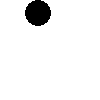

In [24]:
from PIL import ImageDraw

# new image
im = Image.new(mode='L', size=(100, 100), color=WHITE)

# draw object
draw = ImageDraw.Draw(im)
draw.ellipse(xy=((25, 0), # starting coordinate
                 (50, 25)), # ending coordinate
             fill=BLACK)

# im.save('images/circle_draw_example.jpg')
im

Difference between 2 images

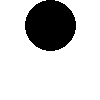

In [37]:
from PIL import ImageChops

# image with a black circle
im1 = Image.new(mode='L', size=(100, 100), color=WHITE)

draw = ImageDraw.Draw(im1)
draw.ellipse(xy=((25, 0), # starting coordinate
                 (75, 50)), # ending coordinate
             fill=BLACK)

# gray circle
im2 = Image.new(mode='L', size=(100, 100), color=WHITE)
draw = ImageDraw.Draw(im2)
draw.ellipse(xy=((50, 0), # starting coordinate
                 (100, 50)), # ending coordinate
             fill=180)
im1.save('images/black_circle.jpg')
im1

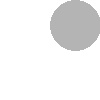

In [38]:
im2.save('images/gray_circle.jpg')
im2

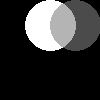

In [39]:
ImageChops.difference(im1, im2).save('images/circle_diff.jpg')
ImageChops.difference(im1, im2)

What's the average difference of these images? 

In [42]:
im_diff = ImageChops.difference(im1, im2)
array_diff = np.asarray(im_diff)

In [45]:
array_diff.mean() / WHITE

0.21438235294117647

In [44]:
array_diff.size

10000

In [47]:
num_pixels = np.zeros(im_diff.size).size
array_diff.sum() / (num_pixels * WHITE)

0.21438235294117647